# 🧪**Machine Learning con Python** / Febrero 2026

##  📘 **Ejercicio 1**
### Modelo de regresión lineal múltiple en base al dataset "advertising.csv".

### 📈 Definición del problema y estrategia:

El dataset contiene **3 variables** (que consideraremos variables independientes) que representan la cantidad de dinero invertido en un medio publicitario determinado, a saber: "TV","Radio" y "Prensa/Newspaper".

También tenemos el **registro de las ventas** asociadas para cada evento de inversión  (que consideraremos como variable dependiente), donde se pueden combinar los distintos medios publicitarios.


En función de esto, trataremos de determinar si hay alguna relación entre la inversión en alguno de estos medios, o una combinación específica entre ellos, y la cantidad de ventas concretadas.

Inicialmente utilizaremos los métodos de visualización y métricas para intentar evidenciar alguna correlación. Luego, utilizaremos el modelo de regresión lineal múltiple para generar una función que estime las ventas resultantes según la inversión.



**Paso 0:** Importaciones.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
import sklearn.metrics as sm

**Paso 1:** Carga de datos. 

Extraemos los datos desde el archivo origen como un dataframe, y exploramos los encabezados y primeros datos.

In [2]:
df_advertising = pd.read_csv('advertising.csv')
print(df_advertising.head())

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9


Validación del dataset: verificamos tipo y valores esperados.

In [3]:
for col in df_advertising.columns:
    column = df_advertising[col]

    try:
        # 1️⃣ Sin valores nulos
        assert not column.isnull().any()

        # 2️⃣ Convertible a float
        column_float = pd.to_numeric(column, errors='raise')

        # 3️⃣ Valores positivos
        assert (column_float >= 0).all()

        # ✔ Columna válida
        print(f"Columna {col} validada ✔")

    except:
        print(f"Columna {col} no contiene los formatos esperados ❌")
        pass

Columna TV validada ✔
Columna Radio validada ✔
Columna Newspaper validada ✔
Columna Sales validada ✔


Para este problema no es necesario el paso adicional de transformación, ya que no hay variables categóricas, o columnas sin utilidad que sea conveniente eliminar.

**Paso 2:** Visualización inicial (gráfico de dispersión de Sales/índices de los datos)

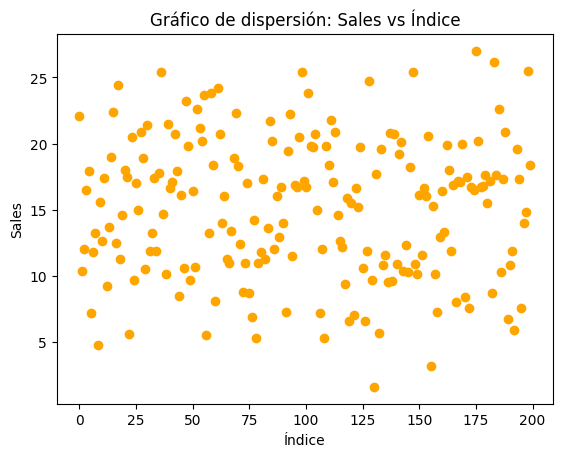

In [4]:
plt.figure()
plt.scatter(df_advertising.index, df_advertising["Sales"], color = "orange")

# Etiquetas
plt.xlabel("Índice")
plt.ylabel("Sales")
plt.title("Gráfico de dispersión: Sales vs Índice")

plt.show()


Podemos observar densidades relativamente uniformes de sales a medida que aumentamos el valor del índice. Por otro lado, en principio la distribución aparenta ser compacta y no amerita el uso de los modelos Lasso o Ridge.

Generamos una tabla para explorar posibles correlaciones entre las variables.

In [5]:
df_advertising.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


La tabla nos indica un primer indicio de que la TV tiene (notablemente) mayor peso, luego la radio, y en último lugar la prensa.

**Paso 3:** Determinación de conjuntos de entrenamiento y de prueba.

In [6]:
datos_e, datos_p = train_test_split(df_advertising, test_size=0.2, random_state=42)

print (f"Datos totales en el dataset: {len(df_advertising)}")
print(f"Datos de entrenamiento: {len(datos_e)} filas")
print(f"Datos de prueba: {len(datos_p)} filas")

Datos totales en el dataset: 200
Datos de entrenamiento: 160 filas
Datos de prueba: 40 filas


**Paso 4:** Instanciamos el modelo de regresión lineal múltiple. Ajustamos con los datos de entrenamiento.

In [7]:
sales = datos_e["Sales"]

linear_regressor = LinearRegression()
linear_regressor.fit(datos_e.drop(columns=["Sales"]), sales)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


Pendientes de la función estimada (coeficientes de las variables: TV, radio, prensa).

In [8]:
linear_regressor.coef_

array([0.05450927, 0.10094536, 0.00433665])

Ordenada al origen de la función

In [9]:
linear_regressor.intercept_

np.float64(4.714126402214127)

Entonces, la recta estimada para las ventas es = 

$$
\hat{Ventas} = 4.7141 
+ 0.0545\,TV 
+ 0.1009\,Radio 
+ 0.0043\,Prensa
$$


In [10]:
Y_pred = linear_regressor.predict(datos_e.drop(columns=["Sales"]))

**Paso 5:** Evaluación del modelo (Métricas y gráficos)

In [11]:
Y_pred_p = linear_regressor.predict(datos_p.drop(columns=["Sales"]))

Revisamos las métricas

In [12]:
print("Error absoluto medio =", round(sm.mean_absolute_error(datos_p["Sales"], Y_pred_p), 2))
print("Error cuadratico medio =", round(sm.mean_squared_error(datos_p["Sales"], Y_pred_p), 2))
print("Error absoluto mediano =", round(sm.median_absolute_error(datos_p["Sales"], Y_pred_p), 2))
print("Puntuación de varianza explicada =", round(sm.explained_variance_score(datos_p["Sales"], Y_pred_p), 2))
print("Puntuación R2 =", round(sm.r2_score(datos_p["Sales"], Y_pred_p), 2))

Error absoluto medio = 1.27
Error cuadratico medio = 2.91
Error absoluto mediano = 0.98
Puntuación de varianza explicada = 0.91
Puntuación R2 = 0.91


Gráfico de dispersión con datos pronosticados y de prueba.

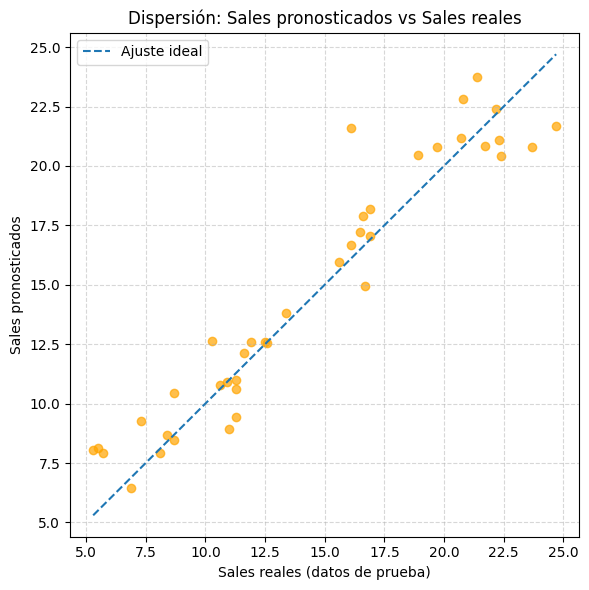

In [13]:
# Valores reales y predichos
y_test = datos_p["Sales"].values

# Límites comunes para ambos ejes
min_val = min(y_test.min(), Y_pred_p.min())
max_val = max(y_test.max(), Y_pred_p.max())

plt.figure(figsize=(6, 6))

# Dispersión
plt.scatter(y_test, Y_pred_p, alpha=0.7, color = "orange")

# Recta ideal y = x
plt.plot([min_val, max_val], [min_val, max_val], linestyle="--", label="Ajuste ideal")

plt.xlabel("Sales reales (datos de prueba)")
plt.ylabel("Sales pronosticados")
plt.title("Dispersión: Sales pronosticados vs Sales reales")

# Escala 
plt.axis("equal")
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend()

plt.tight_layout()
plt.show()


Gráfico de línea de los errores porcentuales sobre los datos de prueba.

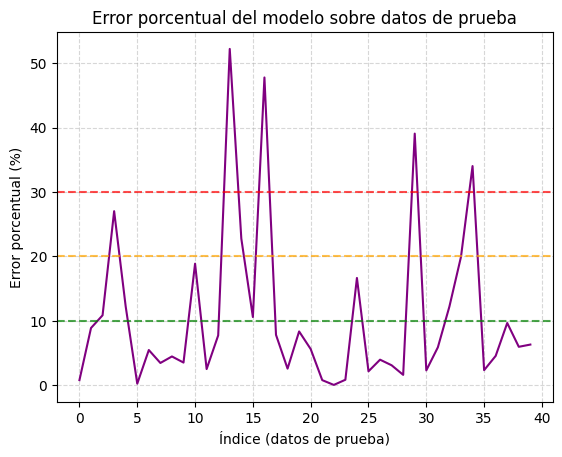

In [14]:
error_porcentual = abs(
    (datos_p["Sales"] - Y_pred_p) / datos_p["Sales"]
) * 100

# Resetear índice para que sea 0..n-1
error_porcentual = error_porcentual.reset_index(drop=True)

plt.figure()
plt.plot(error_porcentual, color = "purple")

# Líneas de referencia
plt.axhline(10, linestyle="--", color="green", alpha=0.7, label="10%")
plt.axhline(20, linestyle="--", color="orange", alpha=0.7, label="20%")
plt.axhline(30, linestyle="--", color="red", alpha=0.7, label="30%")

plt.xlabel("Índice (datos de prueba)")
plt.ylabel("Error porcentual (%)")
plt.title("Error porcentual del modelo sobre datos de prueba")

plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


## Primeras conclusiones.

A partir del análisis exploratorio y del modelo de regresión lineal múltiple, se observa que existe una relación clara entre la inversión publicitaria y las ventas, **siendo la publicidad en Radio la variable con mayor influencia.**

El modelo logra un buen ajuste sobre los datos de prueba, lo cual se refleja tanto en la cercanía de las predicciones a los valores reales como en las métricas obtenidas, con un alto coeficiente de determinación y errores promedio bajos. 

En general, el modelo presenta un desempeño satisfactorio para describir la tendencia global de los datos, aunque se registran algunos errores porcentuales elevados en observaciones puntuales.

## Anexo: Probamos mejorar el modelo con Ridge.

In [ ]:
ridge = Ridge(alpha=1.0)

ridge.fit(datos_e.drop(columns=["Sales"]), sales)

y_pred_ridge = ridge.predict(datos_p.drop(columns=["Sales"]))

In [18]:
print("Error absoluto medio =", round(sm.mean_absolute_error(datos_p["Sales"], y_pred_ridge), 2))
print("Error cuadratico medio =", round(sm.mean_squared_error(datos_p["Sales"], y_pred_ridge), 2))
print("Error absoluto mediano =", round(sm.median_absolute_error(datos_p["Sales"], y_pred_ridge), 2))
print("Puntuación de varianza explicada =", round(sm.explained_variance_score(datos_p["Sales"], y_pred_ridge), 2))
print("Puntuación R2 =", round(sm.r2_score(datos_p["Sales"], y_pred_ridge), 2))

Error absoluto medio = 1.27
Error cuadratico medio = 2.91
Error absoluto mediano = 0.98
Puntuación de varianza explicada = 0.91
Puntuación R2 = 0.91


Repetimos gráficos 

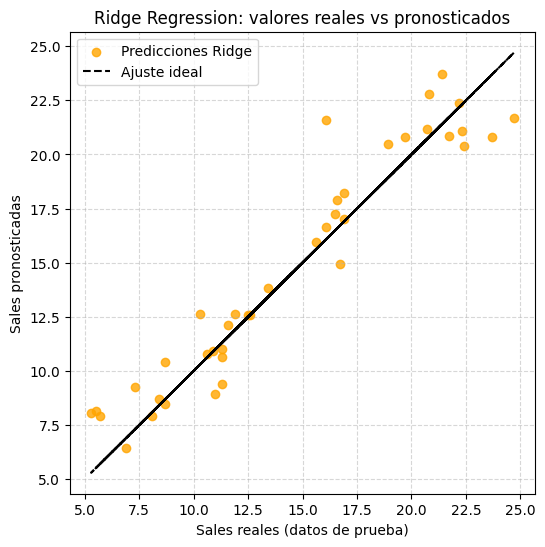

In [16]:
y_test = datos_p["Sales"].values

plt.figure(figsize=(6, 6))

plt.scatter(y_test, y_pred_ridge, alpha=0.8, label="Predicciones Ridge", color = "orange")
plt.plot(y_test, y_test, linestyle="--", color="black", label="Ajuste ideal")

plt.xlabel("Sales reales (datos de prueba)")
plt.ylabel("Sales pronosticadas")
plt.title("Ridge Regression: valores reales vs pronosticados")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)

plt.show()


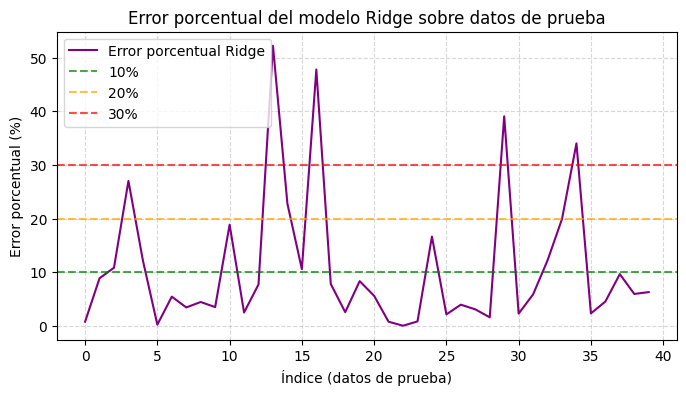

In [17]:
# Error porcentual absoluto
error_porcentual_ridge = abs(
    (y_test - y_pred_ridge) / y_test
) * 100

plt.figure(figsize=(8, 4))
plt.plot(error_porcentual_ridge, color="purple", label="Error porcentual Ridge")

# Líneas de referencia
plt.axhline(10, linestyle="--", color="green", alpha=0.7, label="10%")
plt.axhline(20, linestyle="--", color="orange", alpha=0.7, label="20%")
plt.axhline(30, linestyle="--", color="red", alpha=0.7, label="30%")

plt.xlabel("Índice (datos de prueba)")
plt.ylabel("Error porcentual (%)")
plt.title("Error porcentual del modelo Ridge sobre datos de prueba")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)

plt.show()


### Conclusión: Análisis de Sensibilidad y Capacidad Predictiva

El desarrollo del modelo de regresión lineal múltiple para el dataset Advertising permite extraer conclusiones clave sobre la eficiencia de la inversión publicitaria.

- **Desempeño del Modelo**: El coeficiente de determinación ($R^2 \approx 0.91$) indica que el modelo explica el 91% de la variabilidad de las ventas. La alta densidad de puntos sobre la línea de 45° en el gráfico de Valores Reales vs. Predichos confirma que el modelo tiene un error residual bajo y una excelente capacidad de generalización.

- **Análisis de Sensibilidad (Coeficientes)**: Se identificó que la TV es el medio con mayor impacto positivo en las ventas, seguido por la Radio. Por el contrario, el coeficiente de Newspaper es marginal, sugiriendo que su aporte al incremento de ventas es despreciable en comparación con los otros medios.

- **Estabilidad del Modelo**: La comparación con la regresión Ridge y el análisis del error porcentual demuestran que el modelo es sumamente estable. Al no observarse cambios significativos en las métricas al aplicar regularización, se descarta la presencia de sobreajuste (overfitting) o multicolinealidad grave.


Los resultados sugieren que para maximizar el retorno de inversión, la estrategia publicitaria debería concentrarse en TV y Radio, dado que el impacto de la Prensa parece ser estadísticamente irrelevante en este escenario.